# Анализ бизнес показателей приложения Procrastinate_Pro+

Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.
Доступны данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
* лог сервера с данными об их посещениях,
* выгрузка их покупок за этот период,
* рекламные расходы.

**ЦЕЛИ**\
***Используя предоставленные данные, необходимо выяснить:***
* откуда приходят пользователи и какими устройствами они пользуются,
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент,
* когда расходы на привлечение клиента окупаются,
* какие факторы мешают привлечению клиентов.

**Ход исследования**
1. Загрузка данных
  * иморт всех необходимых библиотек
  * импорт трех предоставленных датасетов
  * изучение и предобработка данных
  
2. Задаем необходимые функции для дальнейшего исследования
  * get_profiles() — для создания профилей пользователей
  * get_retention() — для подсчёта Retention Rate,
  * get_conversion() — для подсчёта конверсии
  * get_ltv() — для подсчёта LTV
  * filter_data() — для сглаживания данных
  * plot_retention() - для построения графика Retention Rate,
  * plot_conversion() — для построения графика конверсии,
  * plot_ltv_roi — для визуализации LTV и ROI

3. Исследовательский анализ данных
  * составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей
  * распределение привлеченных пользователей по странам
  * какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи
  * из каких рекламных каналов пришло больше всего платящих пользователей
4. Маркетинг

  * рассчитаем общие маркетинговые расходы
  * как траты распределены по рекламным источникам
  * построим графики с визуализацией динамики изменения расходов во времени по неделям по каждому источнику
  * сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника
  
5. Оценка окупаемости рекламы
  * построим графиrи LTV,ROI,CAC для оценки окупаемости
  * построим графики для оценки окупаемости по регионам, утройствам. каналам привлечения
  * посчитаем конверсию и удержание
  
6. Общий вывод и рекомендации



## Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [ ]:
#импортируем нужные для анализа библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
#прочитаем файлы
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
ad_costs = pd.read_csv('/datasets/costs_info_short.csv')

display(visits.head(5),orders.head(5),ad_costs.head(5))


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


### Знакомство с таблицей `visits`


поскольку подобный запрос нам предстоит писать еще для двух таблиц, напишем функцию

In [ ]:
def data_acquaintance(data):
    # Вывод информации о данных
    display(data.head(5))
    print('*'*50)
    data.info()
    print('*'*50)
    # Подсчет количества пропущенных значений
    display('Количество пропусков', data.isna().sum())
    print('*'*50)
    # Проверка на наличие дубликатов
    display('Число дубликатов:', data.duplicated().sum())

data_acquaintance(visits)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
**************************************************


'Количество пропусков'

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

**************************************************


'Число дубликатов:'

0

In [ ]:
#проверим на неявные дубликаты и посмотрим уникальные значения в столбцах region,device,channel
print('Регионы', visits['Region'].unique())
print()
print('Каналы', visits['Channel'].unique())
print()
print('Устройства', visits['Device'].unique())

Регионы ['United States' 'UK' 'France' 'Germany']

Каналы ['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']

Устройства ['iPhone' 'Mac' 'Android' 'PC']


В ходе изучение таблицы `visits` видим:
* в таблице 309901 строк, хранятся данные о пользователях из 4х стран
* отсутствуют явные и неявные дубликаты
* пропусков не обнаружили
* нужно заменить название столбцов на "змеиный стиль"
* изменить тип данных в столбцах 'Session Start ' и 'Session End'

In [ ]:
#переименуем название колонок
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

In [ ]:
#приведем даты к нужному типу данных
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

### Знакомство с таблицей `orders`

In [ ]:
#применим функцию и посмотрим необходимую информацию для ознакомления
data_acquaintance(orders)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
**************************************************


'Количество пропусков'

User Id     0
Event Dt    0
Revenue     0
dtype: int64

**************************************************


'Число дубликатов:'

0

In [ ]:
#проверим сумму заказов на выбросы
orders['Revenue'].describe()

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: Revenue, dtype: float64

In [ ]:
orders['Revenue'].value_counts()

4.99     38631
5.99       780
9.99       385
49.99      212
19.99      204
Name: Revenue, dtype: int64

Изучив данные таблицы `orders`модно казать следущее:\

* в таблице 40212 строк
* отсутствуют явные дубликаты
* пропусков не обнаружили
* в столбце с выручкой  в 96% стоимость покупки составляла - 4.99 (это  минимальная сумма заказа), но есть пользователи совершавшие больше покупок)
* нужно заменить название столбцов на "змеиный стиль"
* изменить тип данных в столбцe 'Event Dt'

In [ ]:
#переименуем название колонок
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [ ]:
orders['event_dt']= pd.to_datetime(orders['event_dt'])

### Знакомство с таблицей `ad_costs`

In [ ]:
#используя функцию ознакомимся с таблицей
data_acquaintance(ad_costs)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
**************************************************


'Количество пропусков'

dt         0
Channel    0
costs      0
dtype: int64

**************************************************


'Число дубликатов:'

0

In [ ]:
print('Каналы привлечения', ad_costs['Channel'].unique())

Каналы привлечения ['FaceBoom' 'MediaTornado' 'RocketSuperAds' 'TipTop' 'YRabbit'
 'AdNonSense' 'LeapBob' 'OppleCreativeMedia' 'WahooNetBanner'
 'lambdaMediaAds']


In [ ]:
ad_costs['costs'].describe()

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

Изучив данные таблицы `ad_costs` можно казать следущее:\

* в таблице 1800 строк
* отсутствуют явные и неявные дубликаты
* пропусков не обнаружили
* в столбце с затратами на рекламу видим большой разброс.
* нужно првести название столбцов к единому стилю
* изменить тип данных в столбцe 'dt'

In [ ]:
ad_costs.columns = ad_costs.columns.str.lower().str.replace(' ', '_')
ad_costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

In [ ]:
ad_costs['dt']= pd.to_datetime(ad_costs['dt']).dt.date

**ВЫВОД**\
В целом можно сказать, что предоставленны качественные данные.\
Произвели предобработку данных, проверили данные на наличие пропусков и  дубликов(они отсутствуют),
привели название столбцов к единому стилю и заменили типы данных для некоторых столбцов.

## Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

### **функции для вычисления значений метрик**

#### **функция get_profiles()**

In [ ]:
#функция для создания профилей пользователей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### **функция get_retention()**

In [ ]:
#функция для расчета удержания
def get_retention(profiles, sessions, observation_date, horizon_days, dimensions = [], ignore_horizon = False):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    # тех, которые присоединились позже, чем observation_date - horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     # строим «треугольную таблицу»
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # присоединяем размеры когорт к «треугольной» таблице
        result = result.div(result['cohort_size'], axis = 0)                                                     # делим каждую «ячейку» на соответствующий размер когорты и получаем retention rate
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # исключаем все лайфтаймы, превышающие горизонт анализа
        result['cohort_size'] = cohort_sizes                                                                     # восстанавливаем размеры когорт
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)

    # возвращаем обе таблицы и сырые данные
    # сырые данные пригодятся, если нужно будет отыскать ошибку в расчётах
    return result_raw, result_grouped, result_in_time

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### **функция get_conversion()**

In [ ]:
#функция для расчета конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### **функция get_ltv()**

In [ ]:
#функция для расчёта LTV и ROI
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC,
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### **функции для построения графиков**

#### **функция filter_data()**

In [ ]:
#функция для сглаживания данных
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

#### **функция plot_retention()**

In [ ]:
#функция для визуализации удержания
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    plt.tight_layout()
    plt.show()

#### **функция plot_conversion()**

In [ ]:
#функция для визуализации конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### **функция plot_ltv_roi**

In [ ]:
#функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

###  Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.

In [ ]:
#составим профили пользователей с помощью функции 'get_profiles()'
profiles = get_profiles(visits, orders,ad_costs)
display(profiles.head())
#посчитаем количество профилей
print('Всего профилей польователей:',len(profiles))

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Всего профилей польователей: 150008


In [ ]:
#определим минимальную и максимальную даты привлечения пользователей
min_analysis_date = profiles['dt'].min()
max_analysis_date = profiles['dt'].max()
print('Минимальная дата привлечения клиентов:',min_analysis_date)
print('Максимальная дата привлечения клиентов:',max_analysis_date)

Минимальная дата привлечения клиентов: 2019-05-01
Максимальная дата привлечения клиентов: 2019-10-27


***Вывод:*** Получили 150008 пользовательских профилей, в каждом из которых есть данные о дате первого посещения и рекламном канале(благодаря которому пользователь посетил приложение),тип девайса, а также САС
Определили минимальную и максимальную даты привлечения пользователей

### Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.

напишем функцию для построения таблицы и расчета доли платящих пользователей

In [ ]:
def calculate_payers(data, group_by):
    result = data.groupby(group_by)[['user_id', 'payer']]\
                 .agg({'user_id': 'nunique', 'payer':'sum'})\
                 .sort_values(by='payer', ascending=False).reset_index()

    result.columns = [group_by,'total_users','payers']
    result['payer_rate,%'] = round((result['payers'] / result['total_users']) * 100, 2)
    result['group_rate,%'] = round((result['total_users'] / result['total_users'].sum()) * 100, 2)

    return result

напишем функцию для построения графиков

In [ ]:
def plot_users_dist(profiles_x, col_name):
    plt.figure(figsize=(18, 5))

    # Первый подграфик - круговая диаграмма с распределением пользователей
    ax1 = plt.subplot(1, 2, 1)
    plt.pie(profiles_x['group_rate,%'], labels=profiles_x[col_name], autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title('Распределение пользователей по {}'.format(col_name)
    )
    plt.legend(title= col_name, loc='upper left', labels=profiles_x[col_name])


    # Второй подграфик - столбчатая диаграмма с долей платящих пользователей
    ax2 = plt.subplot(1, 2, 2)
    profiles_x.sort_values(by='payer_rate,%', ascending=False).plot.bar(
        x=col_name, y='payer_rate,%', grid=True,
        title='Доля платящих пользователей по {}'.format(col_name),
        rot=30, color='c', ax=ax2
    ).set(xlabel=col_name, ylabel='Доля в %')

    plt.show()

In [ ]:
#посчитаем долю платящих пользователей из каждой страны
profiles_region  = calculate_payers(profiles,'region')
profiles_region

,region,total_users,payers,"payer_rate,%","group_rate,%"
0,United States,100002,6902,6.90,66.66
1,UK,17575,700,3.98,11.72
2,France,17450,663,3.80,11.63
3,Germany,14981,616,4.11,9.99


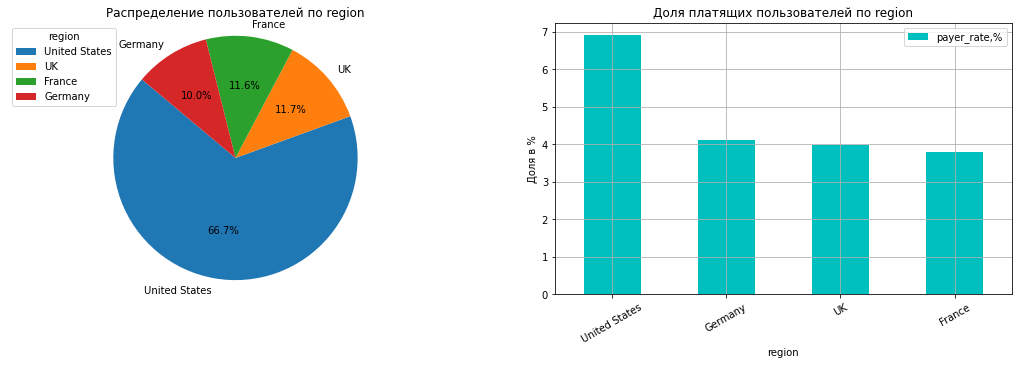

In [ ]:
plot_users_dist(profiles_region, 'region')

Мы видим, что самая большая доля пользователей - пользователи из Америки(66.1%),остальные страны распределены примерно одинаково .
Больше всего платящих пользователей также Америке,на втором месте пользователи и Германии

### Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [ ]:
profiles_device =calculate_payers(profiles,'device')

profiles_device

,device,total_users,payers,"payer_rate,%","group_rate,%"
0,iPhone,54479,3382,6.21,36.32
1,Android,35032,2050,5.85,23.35
2,Mac,30042,1912,6.36,20.03
3,PC,30455,1537,5.05,20.30


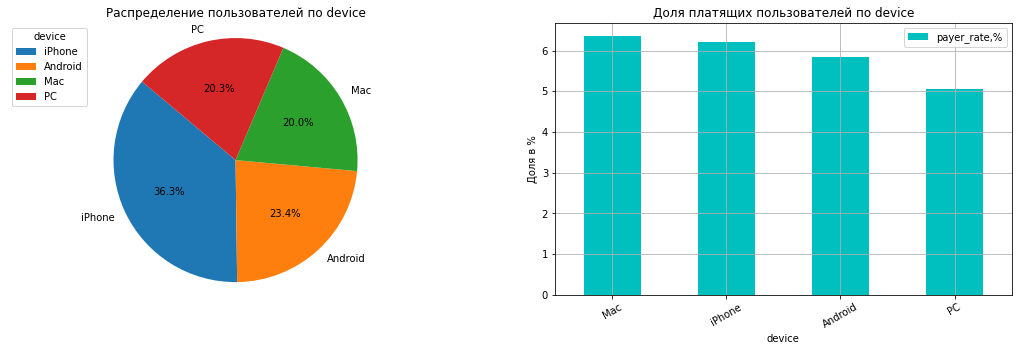

In [ ]:
plot_users_dist(profiles_device, 'device')

Пользователи приложения используют 4 типа устройств(iPhone, Android, Mac и PC).Количество пользователей с iPhone преобладает(36.32% от всех), включая платящих(доля 6.21%).Распределение по количеству пользователей на остальных устройствах распределилось равномерно.\
Но доля платящих клиентов все же выше у пользователей MAC (6.36%)
Самая маленькая доля платящих пользователей пользующихся PC (5.05%)

### Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [ ]:
profiles_channel =calculate_payers(profiles,'channel')
profiles_channel

,channel,total_users,payers,"payer_rate,%","group_rate,%"
0,FaceBoom,29144,3557,12.20,19.43
1,TipTop,19561,1878,9.60,13.04
2,organic,56439,1160,2.06,37.62
3,WahooNetBanner,8553,453,5.30,5.70
4,AdNonSense,3880,440,11.34,2.59
5,RocketSuperAds,4448,352,7.91,2.97
6,LeapBob,8553,262,3.06,5.70
7,OppleCreativeMedia,8605,233,2.71,5.74
8,lambdaMediaAds,2149,225,10.47,1.43
9,YRabbit,4312,165,3.83,2.87


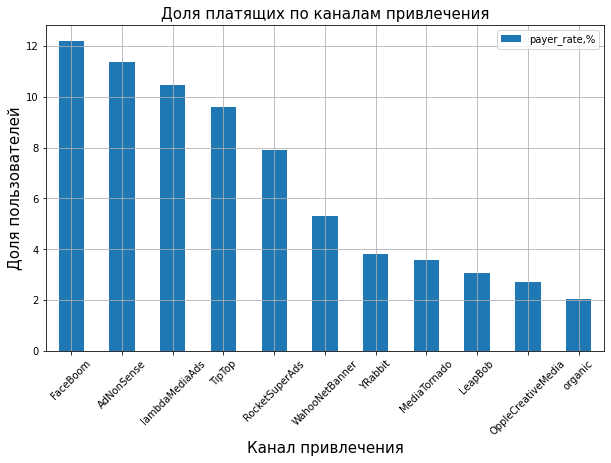

In [ ]:
profiles_channel.sort_values(by='payer_rate,%', ascending=False)\
                                    .plot(kind='bar',rot=45,x='channel',y='payer_rate,%', grid=True ,figsize=(10, 6))
plt.title('Доля платящих по каналам привлечения',fontsize=15)
plt.xlabel('Канал привлечения',fontsize=15)
plt.ylabel('Доля пользователей',fontsize=15)
plt.legend(loc='upper right')
plt.show()

Доля платящих пользователей по рекламным каналам распределяется следующим образом:\
*(можем выделить топ-5 лидирующих рекламных каналов)*\
FaceBoom - 12.2%\
AdNonSense - 11.34% \
lambdaMediaAds - 10.47%\
TipTop - 9.6%\
RocketSuperAds - 7.91%

Наименьшую долю платящих клиентов составляют органические пользователи.(2.06%)

**ВЫВОД**
* Составили пользовательские профили(Получили 150008 профилей)

* Определили минимальную и максимальную даты привлечения пользователей (1.05.2019 и 27.10.2019)

* По результатам исследовательского анализа сделаны следующие наблюдения:
 * Пользователи приходят в приложение из 4 стран(United States,UK,France, Germany).Америка лидирует по количеству пользователей приложения (Две трети всех пользователей), доля платящих пользователей также выше (~7%)
 * Пользователи используют 4 типа устройств(iPhone, Android, Mac и PC).iPhone является самым популярным устройством среди всех клиентов, включая платящих(доля 6.21%). Но доля платящих клиентов все же выше у пользователей MAC (6.36%)\
 Меньше всех доля платящих пользователей пользующихся PC (5.05%)
 * Всего представлено 10 рекламных каналов и органический(пользователи пришедщие самостоятельно)
 количество органических пользователей состовляет почти 40%, тем не мене доля платях пользователей из них самая низкая (2.06%)\
 в топ по доле платящих пользователей входят:FaceBoom - 12.2%б AdNonSense - 11.34%б lambdaMediaAds - 10.47%,TipTop - 9.6%, RocketSuperAds - 7.91%





## Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

### Посчитайте общую сумму расходов на маркетинг.

In [ ]:
print('Общая сумма расходов на маркетинг:',round(ad_costs['costs'].sum(),2))

Общая сумма расходов на маркетинг: 105497.3


### Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [ ]:
#посмотрим распределение расходов на рекламу,выведем сводную таблицу
channel_costs = ad_costs.pivot_table(index='channel', values='costs', aggfunc='sum').sort_values('costs', ascending=False)\
                                                                                    .rename(columns = {'costs':'total_costs'})
channel_costs['rate_%'] = round((channel_costs['total_costs']/channel_costs['total_costs'].sum())*100,2)
display(channel_costs)

,total_costs,rate_%
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


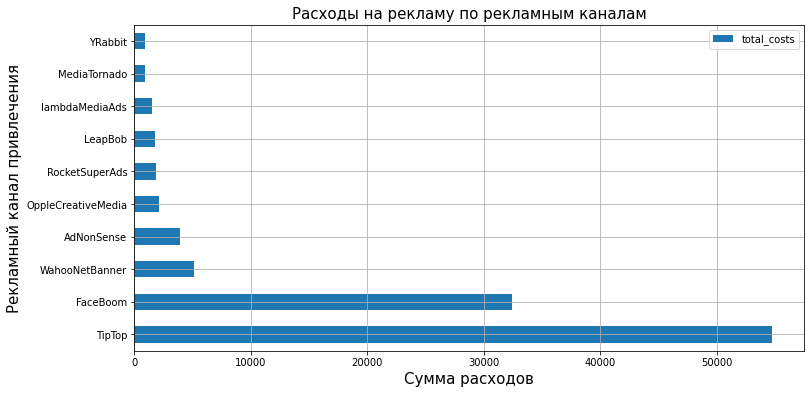

In [ ]:
channel_costs.plot.barh(y='total_costs', grid=True,figsize=(12,6))

plt.title('Расходы на рекламу по рекламным каналам', fontsize=15)
plt.xlabel('Сумма расходов', fontsize=15)
plt.ylabel('Рекламный канал привлечения', fontsize=15)
plt.show()

**Вывод:**
На каналы **TipTop** и **FaceBoom** приходится ~ 82% всех расходов\
Обращаясь к прошлому шагу исследования можно заметить, что больше всего пользователей было привлечено благодаря рекламному каналу **FaceBoom**, а по расходам на рекламу лидирует **TipTop**

### Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.

In [ ]:
ad_costs['dt'] = pd.to_datetime(ad_costs['dt'])
ad_costs['week'] = ad_costs['dt'].dt.isocalendar().week
ad_costs['month'] = ad_costs['dt'].dt.to_period('M')

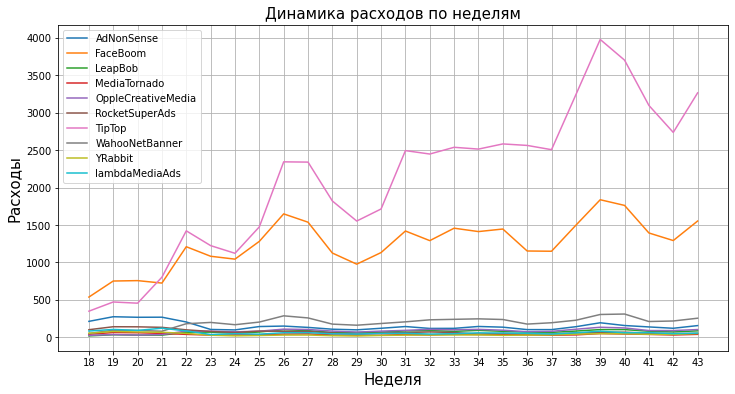

In [ ]:
# Строим динамику расходов по неделям по каждому источнику
costs_week = ad_costs.pivot_table(index='channel', columns='week', values='costs', aggfunc='sum')
costs_week.T.plot(figsize=(12,6), grid=True,xticks=list(costs_week.columns.values))

plt.title('Динамика расходов по неделям',fontsize=15)
plt.xlabel('Неделя',fontsize=15)
plt.ylabel('Расходы',fontsize=15)
plt.legend(loc='upper left')
plt.show()

Из графика видно, что расходы на рекламу через каналы `TipTop` и `FaceBoom` сильно выше остальных каналов привлечения. Расходы на канал `TipTop`активно растут с 20й недели , на канал `FaceBoom` с 21й недели


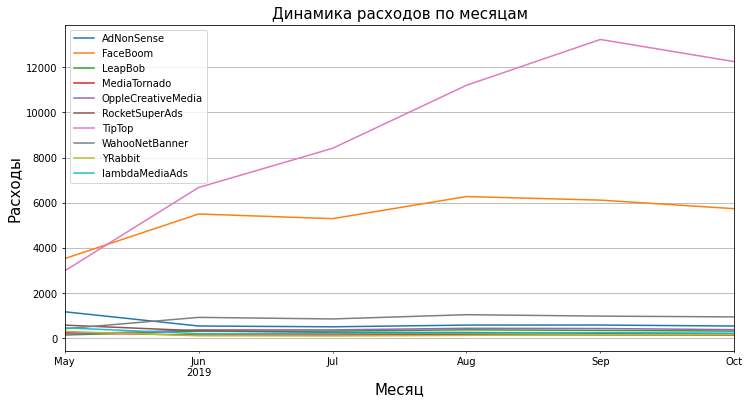

In [ ]:
#Строим динамику расходов по месяцам по каждому источнику привлечения
costs_month = ad_costs.pivot_table(index='channel', columns='month',values='costs', aggfunc='sum')

costs_month.T.plot(figsize=(12,6),grid=True)
plt.title('Динамика расходов по месяцам',fontsize=15)
plt.xlabel('Месяц',fontsize=15)
plt.ylabel('Расходы',fontsize=15)
plt.legend(loc='upper left')
plt.show()

Из графика видно, что пик расходов пришлись на периоды вторая половина июня и сентября на каналы `TipTop`(особенно) и `FaceBoom`\
Остальные каналы получили миниммальные бюджеты,расходы практически не меняются

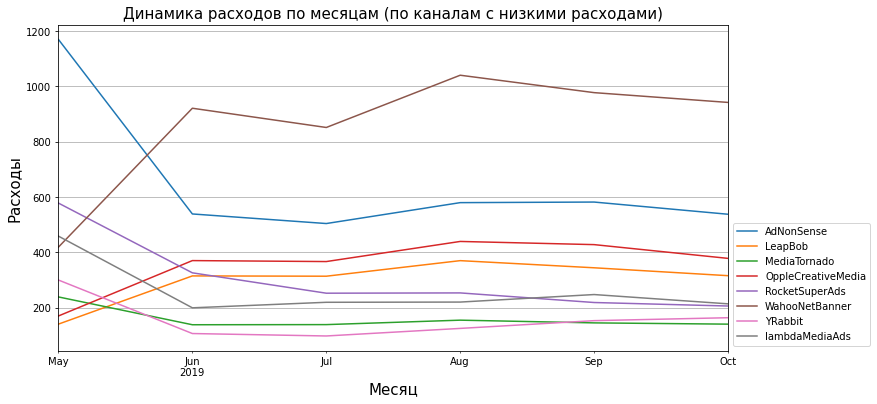

In [ ]:
costs_month.query('channel != ["TipTop","FaceBoom"]').T.plot(figsize=(12,6),grid=True)
plt.title('Динамика расходов по месяцам (по каналам с низкими расходами)',fontsize=15)
plt.xlabel('Месяц',fontsize=15)
plt.ylabel('Расходы',fontsize=15)
plt.legend(loc='lower left',bbox_to_anchor=(1,0))
plt.show()

Изучая данные о расходах по месяцам для каналов, по которым расходы были значительно ниже двух лидирующих, можно сказать:

* динамика расходв по каналу lambdaMediaAds росла до августа, затем начала постепенно снижаться
* Динамика по каналу AdNonSense снизилась уже через месяц и оставалась примерно на одном уровне (это удивительно, учитывая что через этот канал пришло платящих пользователей больше, чем через канал TipTop)
* по остальным каналам расходы примерно через месяц(в июне) снизились и оставались на одном уровне

Все это может говорить о том, что большой упор отдел маркетинга сделал на пользователей, приходящих из двух рекламных каналов (TipTop,FaceBoom)


### Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [ ]:
#сгруппируем данные и посмотрим САС одного пользователя по источникам
#методом query отфильтруем канал 'organic'
cac_channel = profiles.query('channel != "organic"').groupby('channel').agg({'acquisition_cost': 'mean'})\
                    .sort_values(by='acquisition_cost', ascending=False).round(2).rename(columns={'acquisition_cost': 'cac'})\
                    .reset_index()
cac_channel


,channel,cac
0,TipTop,2.80
1,FaceBoom,1.11
2,AdNonSense,1.01
3,lambdaMediaAds,0.72
4,WahooNetBanner,0.60
5,RocketSuperAds,0.41
6,OppleCreativeMedia,0.25
7,YRabbit,0.22
8,MediaTornado,0.22
9,LeapBob,0.21


<Figure size 1440x504 with 0 Axes>

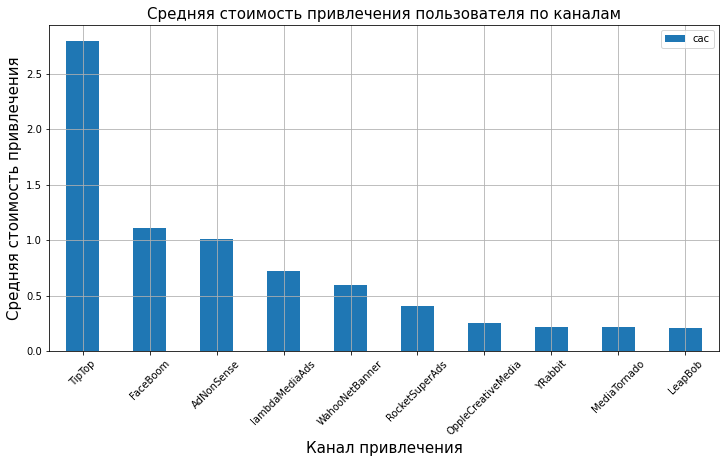

In [ ]:
plt.figure(figsize=(20, 7))
cac_channel.plot.bar(grid=True,x='channel',rot=45, figsize=(12,6))

plt.title('Средняя стоимость привлечения пользователя по каналам',fontsize=15)
plt.xlabel('Канал привлечения', fontsize=15)
plt.ylabel('Средняя стоимость привлечения', fontsize=15)
plt.grid(True)
plt.show()

Дороже всего обходится пользователь из канала `Tip Top` - **2.8 y.e.** \
На пользователей, привлеченных через каналы  `FaceBoom` и `AdNoneSense` в среднем тратят ~ **1 y.e**

Предварительно, можно сказать, что траты на маркетинг в канале Типтоп, необосновано высоки.

**ВЫВОД**\
По результатам анализа маркетинга видим:
* Общий рекламный бюджет на привлечения составил **105497.3 у.е.**
* Набольшие бюджеты были потрачены на каналы **TipTop**(54751.30 у.е. или 51.90 %) и **FaceBoom**(32445.60 у.е.или 30.75%). Это составляет более 80% от общих расходов на рекламу.
* Меньше всего потратили на рекламный канал **YRabbit**(944.22 у.е. или 0.90 %)
* Расходы на канал **FaceBoom** иммеют более равномерный характер распределения, чем **TipTop**, который сильнее растет и имеет резкие скачки в июне и конце сентября
* Пиковые расходы пришлись на периоды вторая половина июня и сентября
* Остальные каналы получили миниммальные бюджеты. Траты на них практически не меняются
* Самые дорогие пользователи : **TipTop**- (2.8у.е.), **FaceBoom** - (1.11 у.е., **AdNonSense** - (1.0 у.е.).


## Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

### Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

Для начала установим мосент и горизонт анализа, а также отфильтруем пользователей с каналом `organic`

In [ ]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

In [ ]:
#отфильтруем профили и посчитаем количество
profiles = profiles.query('channel != "organic"')
print('Количество профилей пользователей:',len(profiles))

Количество профилей пользователей: 93569


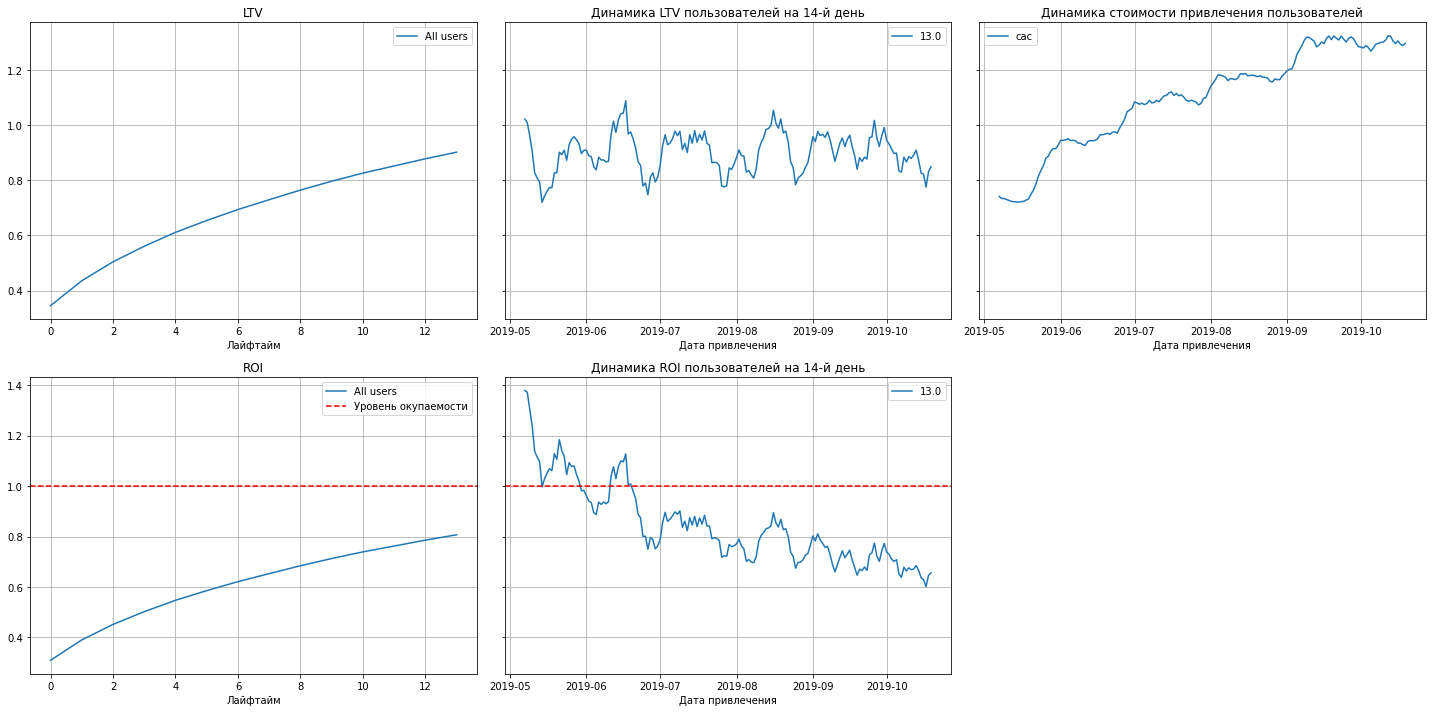

In [ ]:
#применим функцию get_ltv() для расчета метрик окупаемости рекламы
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles,orders,observation_date,horizon_days)

#построим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Из графиков видно:
* LTV стабильно растет, хотя на графике динамки LTV видены влиятния сезонности, в целом качество пользовтелей не ухудшается
* реклама не окупается, ROI к концу второй недели ~80%
* CAC растет на протяжении всего периода анализа,при этом инвестиции не окупаются
* с середины июня привлеченные пользователи перестали окупаться

### Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.

Посчитаем конверсию пользователей  и построим графики

In [ ]:
#применим функцию get_conversion()
conversion_raw, conversion_grouped, conversion_in_time = get_conversion(profiles, orders, observation_date, horizon_days)
display(conversion_grouped)

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,88644,0.058752,0.066321,0.069999,0.072571,0.0745,0.075775,0.076745,0.077591,0.078291,0.078945,0.079362,0.079678,0.079904,0.080197


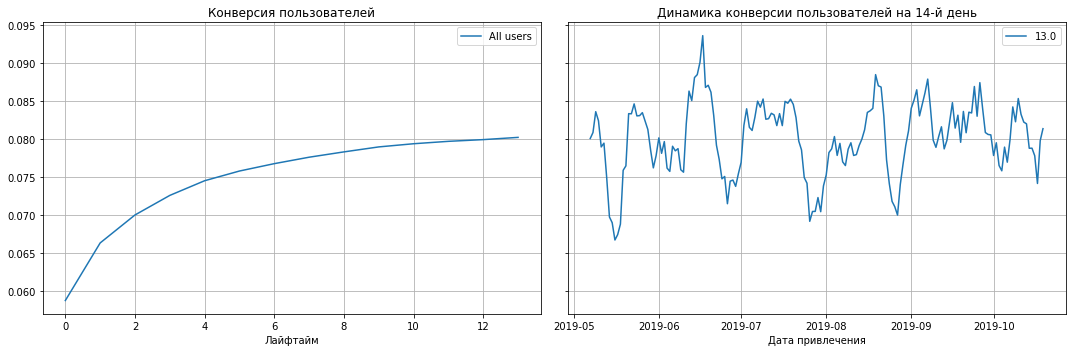

In [ ]:
#построим графики
plot_conversion( conversion_grouped, conversion_in_time, horizon_days)

Из построенных графиков видим:
* конверсия стабильно растет, наиболее активный рост отмесчается до 4го дня
* к концу второй неделе еонверсия составляет ~ 8%

Посчитаем удержание пользователей и построим графики

In [ ]:
#применим функцию get_retention() чтобы посчитать удержание
retention_raw, retention_grouped, retention_in_time = get_retention(profiles, visits, observation_date, horizon_days)
display(retention_grouped)

,cohort_size,0,1,2,3,4,5,6,7,8,9,10,11,12,13
payer,,,,,,,,,,,,,,,
False,81334,1.0,0.176876,0.086594,0.051823,0.033504,0.024701,0.018651,0.014188,0.011729,0.009541,0.007488,0.006393,0.006012,0.004709
True,7310,1.0,0.380985,0.293023,0.235568,0.210260,0.191245,0.166758,0.156908,0.145144,0.136389,0.135021,0.121888,0.118741,0.104925


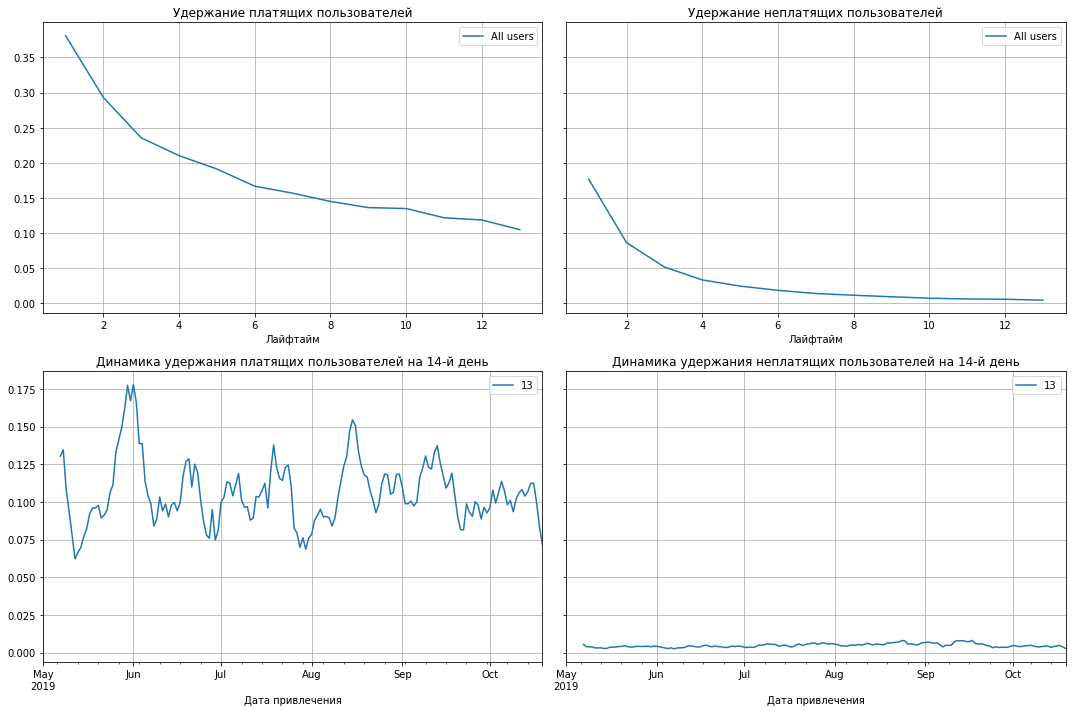

In [ ]:
#построим графики
plot_retention(retention_grouped, retention_in_time , horizon_days)

* Количество неплатящих пользователей превосходит платящих , но удержание платящих пользователей выше
* ~ 10% платящих пользователей продолжают пользоваться приложением на 14й день, а удержание неплатящих пользователей стремится к нулю

### Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

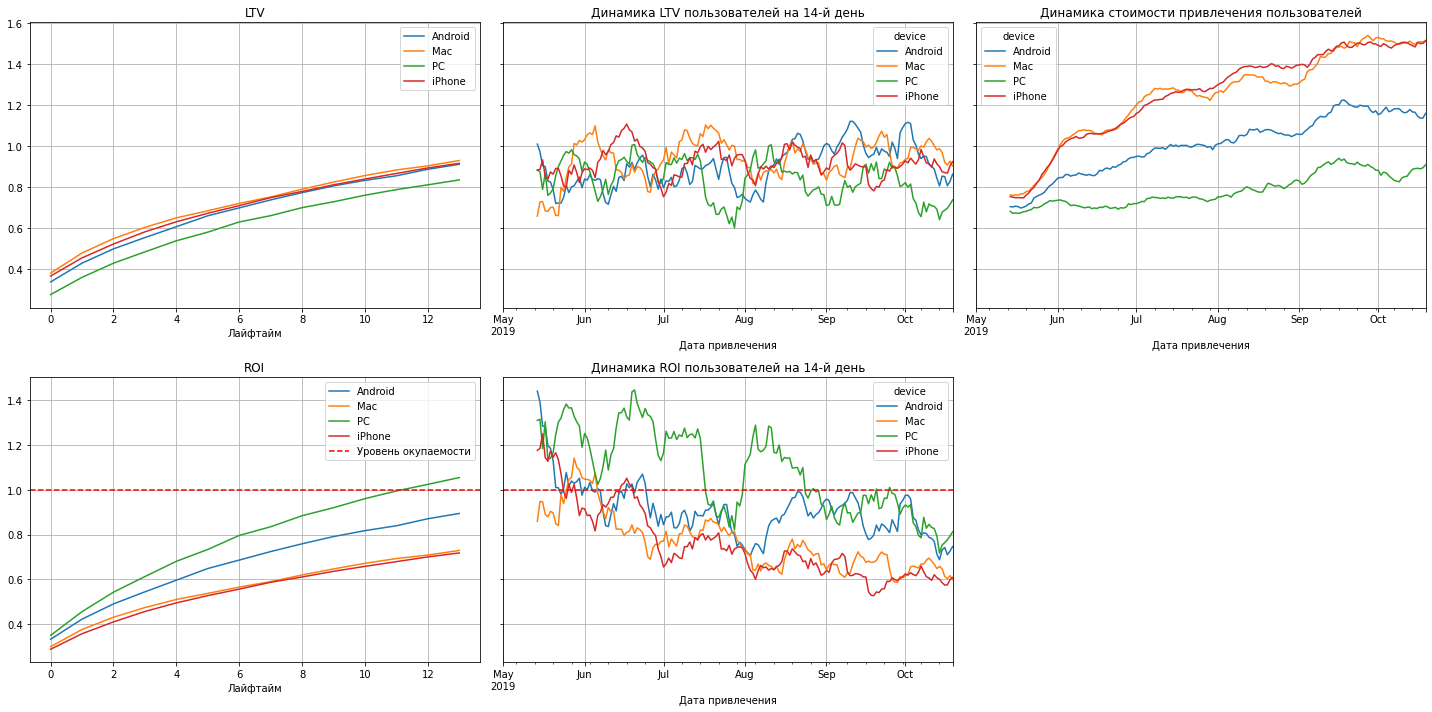

In [ ]:
#зададим параметр dimensions
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

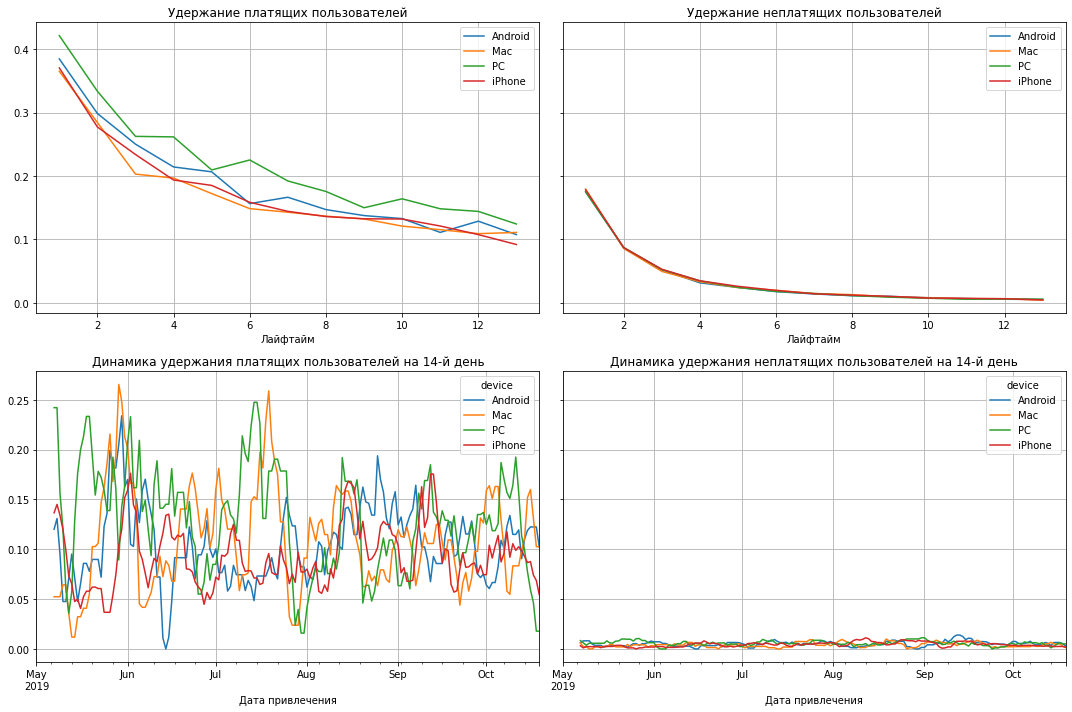

In [ ]:
#посмотрим удержание пользователей в разрезе устройств
retention_raw, retention_grouped, retention_in_time = get_retention(profiles, visits, observation_date,
                                                                    horizon_days, dimensions=dimensions)
#построим графики
plot_retention(retention_grouped, retention_in_time , horizon_days)

* Пользователи PC окупаются, в отличие от Android, Mac и iPhone.
* Динамика стоимости привлечения клиентов показывает, что наименьшие расходы были как раз в отношении пользователей PC, а наибольшие на Iphone и MAC.
* На графике динамики ROI  заметно снижение у всех устройств при росте стоимости привлечения пользователей.
* LTV пользователей подвержен сезонности, но стабилен.
* Выше всего удержание платящих пользователей на PC

### Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

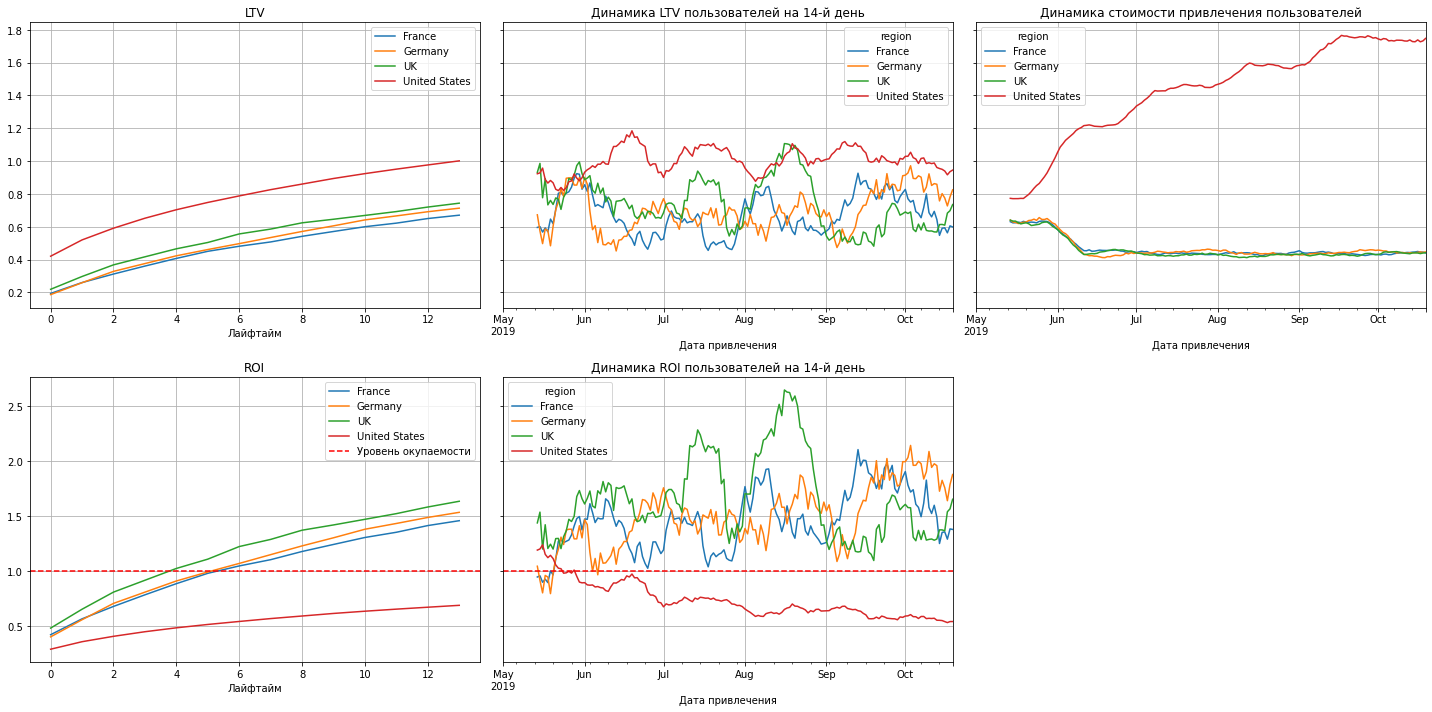

In [ ]:
#зададим параметр dimensions
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Хочу обратить внимание на сходство стоимости привлечения `US` и `Tip Top` это неспроста)

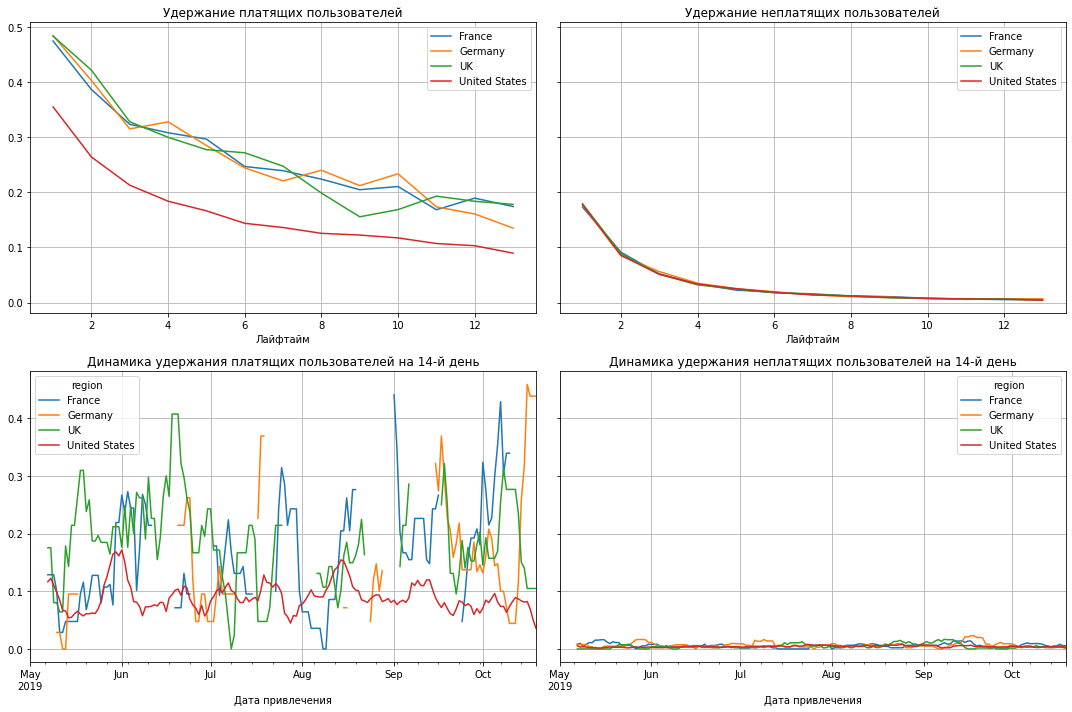

In [ ]:
#посмотрим удержание пользователей в разрезе регионов
retention_raw, retention_grouped, retention_in_time = get_retention(profiles, visits, observation_date,
                                                                    horizon_days, dimensions=dimensions)
#построим графики
plot_retention(retention_grouped, retention_in_time , horizon_days)

* Реклама не окупается в Америке, в остальных регионах окупаемость начинается с 4-5 дня жизни.
* Говоря о динамике окупаемости рекламы по месяцам, по всем регионам, кроме Америки окупаться реклама начинает с середины мая\
* В Америке реклама перестает окупаться уже к концу первого месяца.(ROI падает до 60%)
* LTV всё так же подвержен сезонности, но стабилен
* Удержание платящих пользователей в Америке довольно низкое


### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

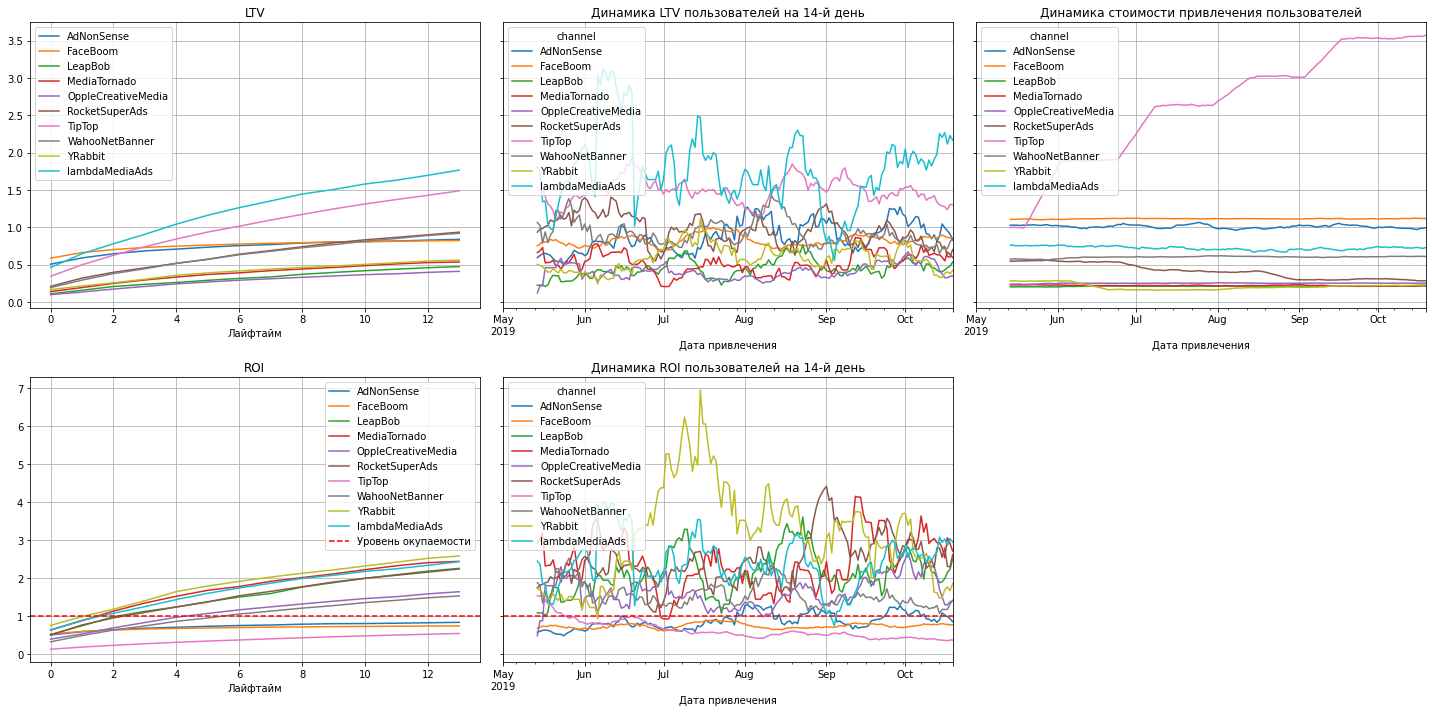

In [ ]:
#зададим параметр dimensions
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

* заметен сильный рост стоимости привлечения пользователей канала `TipTop`.
* В тоже время видно, что реклама на канале `Tip Top` не окупается (не смотря на то, что на потрачено на рекламу было много средств)
* не окупается таке  реклама для каналов `AdNonSense, FaceBoom`
* Хорошую окупаемость показал канал привлечения - `YRabbit`(на 14 день ROI пользователей довольно высок)

Можно предположить, что канал `Tip Top` является основным для привлечения пользователей в Америке.Рассмотрим показатели по каналам в разрезе Америки  и по остальным европейским регионам.

**Окупаемость рекламы по каналам в Америке**

In [ ]:
profiles_usa=profiles.query('region == "United States"').reset_index()
profiles_usa['channel'].unique()

array(['FaceBoom', 'YRabbit', 'MediaTornado', 'RocketSuperAds', 'TipTop'],
      dtype=object)

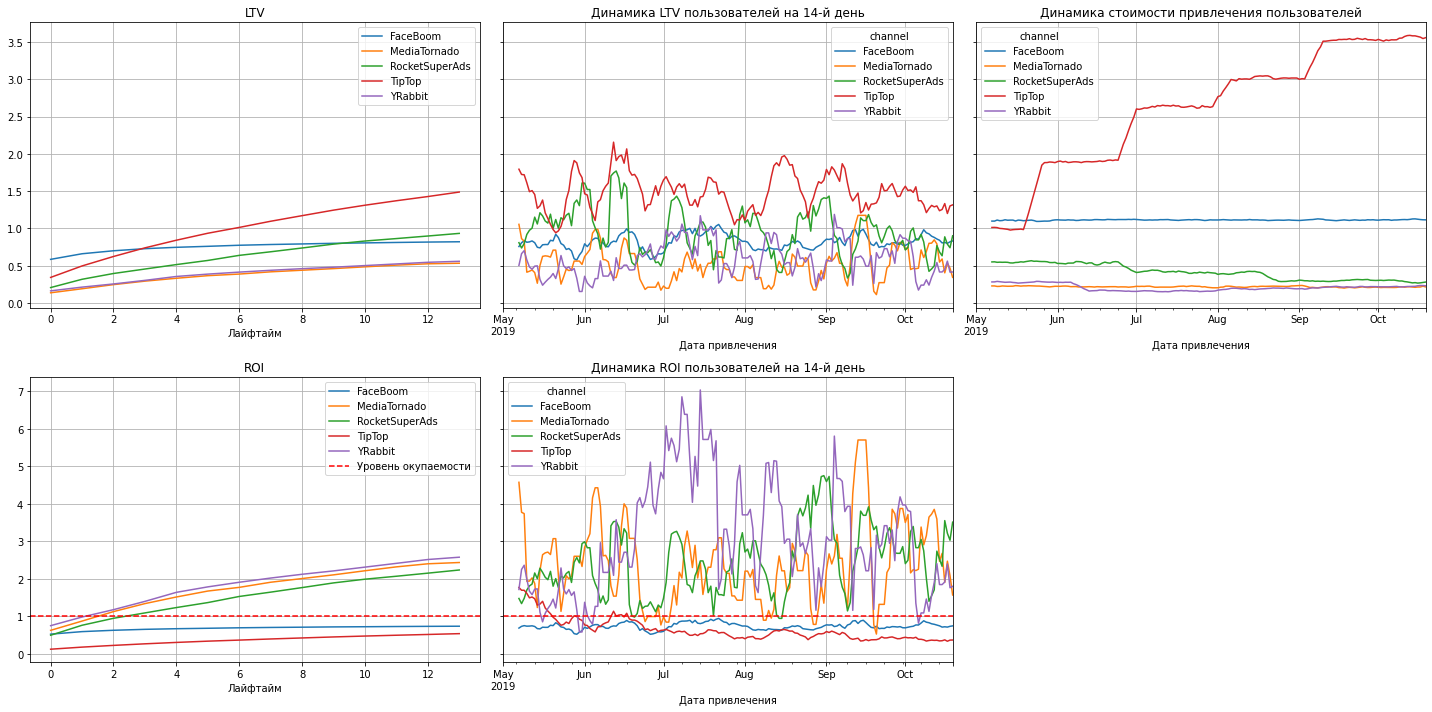

In [ ]:
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_usa,
                                                                      orders,
                                                                      observation_date,
                                                                      horizon_days,
                                                                      dimensions=dimensions)
# передадим функции нужные датафреймы, дату и горизонт анализа, которые мы задали выше
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) #построим графики

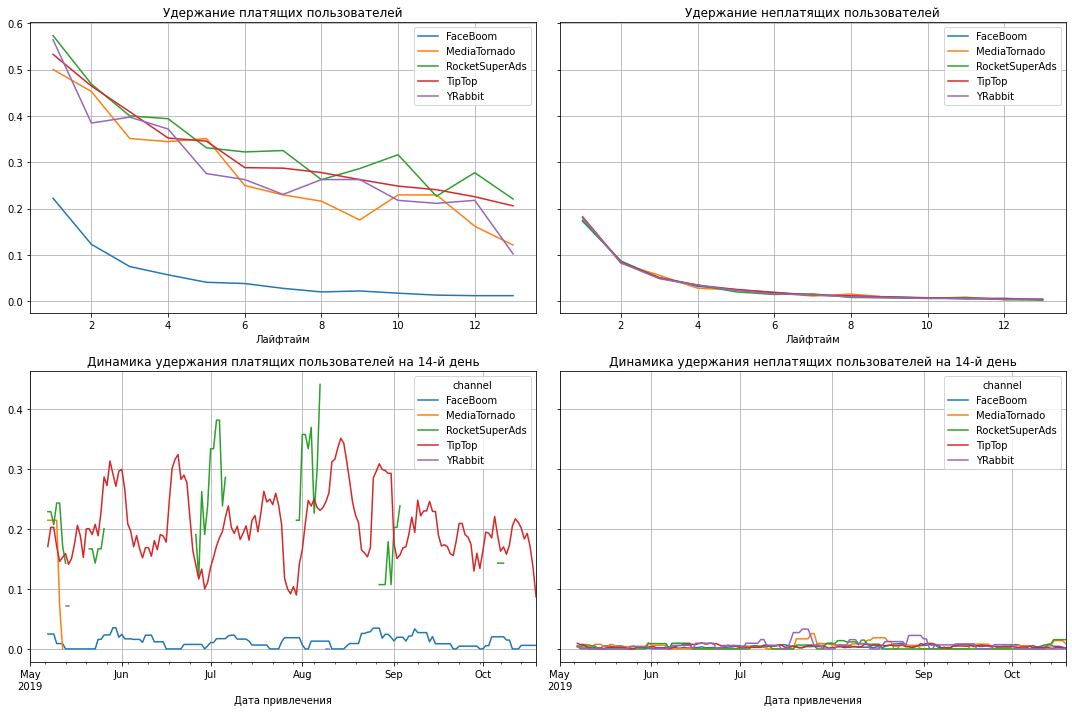

In [ ]:
#посмотрим удержание пользователей в Америке по рекламным каналам
retention_raw, retention_grouped, retention_in_time = get_retention(profiles_usa, visits, observation_date,
                                                                    horizon_days, dimensions=dimensions)
#построим графики
plot_retention(retention_grouped, retention_in_time , horizon_days)

В Америке пользователей привлекают через 5 рекламных каналов.

Не смотря на то что наибольшее числе пользователей пришло через каналы TipTop и FaceBoom, также как и наибоольшие вложения в рекламу были совершены именно по этим каналам, мы видим сто реклама абсолютно не окупается.\
По трем остальным каналам привлечения ситуация хорошая.

Качество пользователей и динамика стабильны.

**Окупаемость рекламы по каналам в остальных регионах(Европе)**

In [ ]:
profiles_europe_regions=profiles.query('region != "United States"').reset_index()
profiles_europe_regions['channel'].unique()

array(['AdNonSense', 'LeapBob', 'WahooNetBanner', 'OppleCreativeMedia',
       'lambdaMediaAds'], dtype=object)

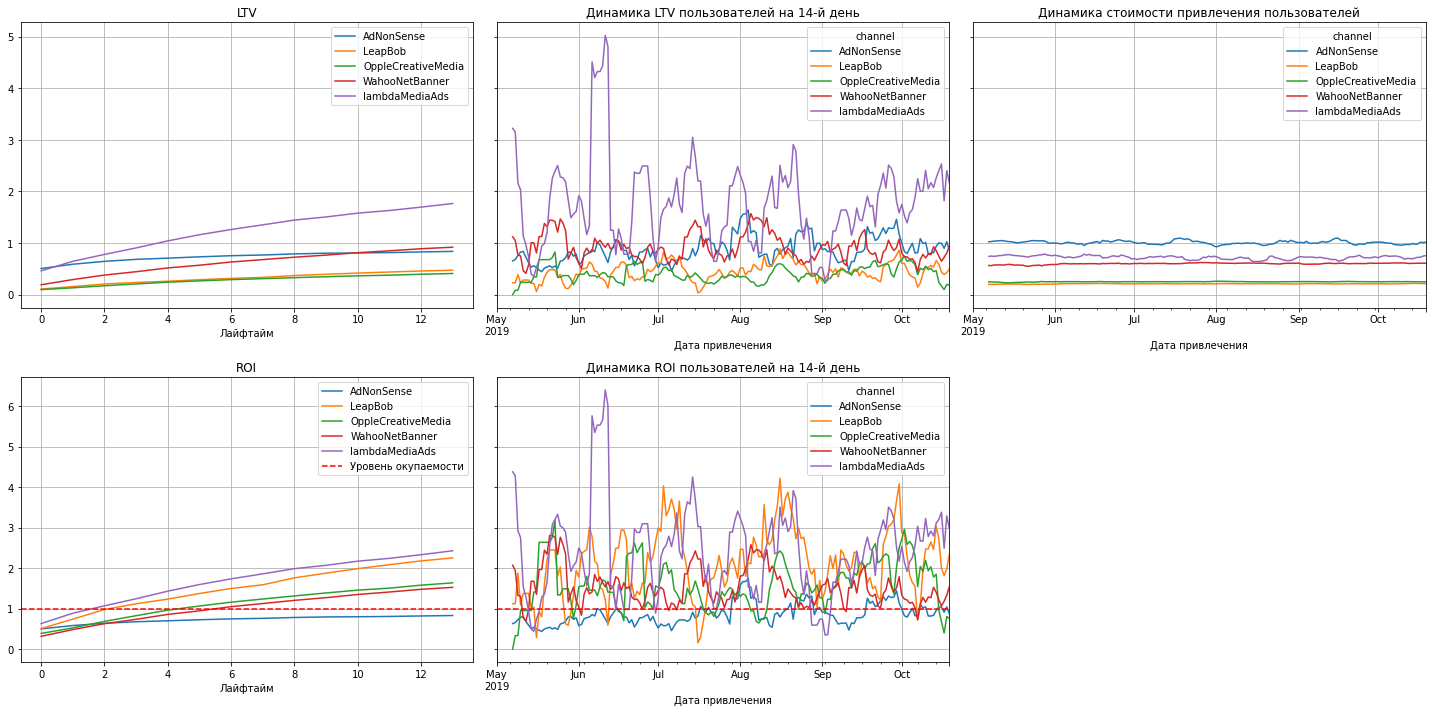

In [ ]:
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_europe_regions,
                                                                      orders,
                                                                      observation_date,
                                                                      horizon_days,
                                                                      dimensions=dimensions)
# передадим функции нужные датафреймы, дату и горизонт анализа, которые мы задали выше
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) #построим графики


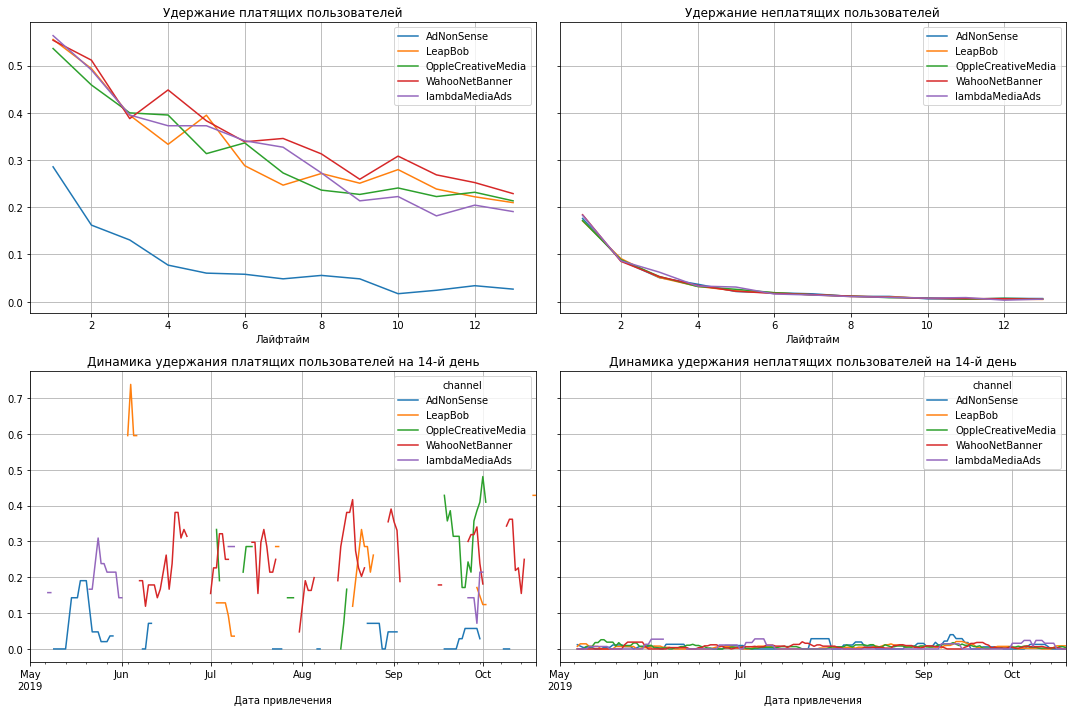

In [ ]:
#посмотрим удержание пользователей по каналам в Европейских регионах
retention_raw, retention_grouped, retention_in_time = get_retention(profiles_europe_regions, visits, observation_date,
                                                                    horizon_days, dimensions=dimensions)
#построим графики
plot_retention(retention_grouped, retention_in_time , horizon_days)

На Европейские регионы также приходится 5 каналов привлечения.\
Динамика стоимости привлечения по всем каналам стабильна.\
Канал **AdNonSense** не окупается , не смотря на наибольшие вложения (из представленных каналов)\
Остальные каналы идут примерно вровень друг с другом.\
Удерживаются пользователи в европейских регионах хуже всего  также по каналу **AdNonSense**

**ВЫВОД**

Ответим на занные вопросы:
    
1. Окупается ли реклама, направленная на привлечение пользователей в целом?\
  реклама не окупается, ROI к концу второй недели ~80%
2. Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?

   * В разрезе по устройствам выявлено снижение динамики окупаемости к 14 дню у всех девайсов при росте стоимости привлечения пользователей. Mac, iPhone и Android показали результаты ниже уровня окупаемости
   * всех стран Америка показала убытки по ROI. Возрастающие расходы на привлечение клиентов не оправдались.\
   * Крупные расходы осуществлялись на канал TipTop, который в результате не показал положительных результатов в окупаемости.
   
3. Чем могут быть вызваны проблемы окупаемости?
   Возможно проблемы вызваны неверным распределением распределением средств на рекламу (в какой-то источник вложено больше средств, чем в остальные, а он не оправдал надежд)

## Общие выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

**Мы провели анализ по предоставленным данным о приложении **`Procractinate Pro +`**


***В ходе анализа мы сделали следующее:***
**1.	Произвели изучение и предобработку данных**
* Произвели предобработку данных, проверили данные на наличие пропусков и дубликов
* привели название столбцов к единому стилю
* заменили типы данных для столбцов с датой


**2.	Провели исследовательский анализ\**
Динамика LTV остается условно стабильной на протяжении всего периода исследования, в то время как расходы на привлечение пользователей (САС) постоянно растут. Это приводит к снижению окупаемости, и к августу ROI опускается ниже предельного уровня (100%).
* Пользователи приходят в приложение из 4 стран(United States,UK,France, Germany).Америка лидирует по количеству пользователей приложения (Две трети всех пользователей), доля платящих пользователей также выше (~7%)
* Пользователи приложения используют 4 типа устройств(iPhone, Android, Mac и PC). Наиболее распространенной устройство  -  IPhone (более 36 %), остальные распределены равномерно
* доля платящих клиентов все же выше у пользователей MAC (6.36%),Iphone на втором месте (доля 6.21%).
* Меньше всех доля платящих пользователей пользующихся PC (5.05%)
* Всего представлено 10 рекламных каналов и органический(пользователи пришедщие самостоятельно) количество органических пользователей состовляет почти 40%, тем не мене доля платях пользователей из них самая низкая (2.06%)
* в топ по доле платящих пользователей входят:FaceBoom - 12.2%б AdNonSense - 11.34%б lambdaMediaAds - 10.47%,TipTop - 9.6%, RocketSuperAds - 7.91%


**3.	Проанализировали маркетинговые параметры**
* Посчитали общий рекламный бюджет , он составил -  **105497.3 у.е.**
* Набольшие бюджеты были потрачены на каналы **TipTop**(54751.30 у.е. или 51.90 %) и **FaceBoom**(32445.60 у.е.или 30.75%). Это составляет более 80% от общих расходов на рекламу.
* Меньше всего потратили на рекламный канал **YRabbit**(944.22 у.е. или 0.90 %)
* Расходы на канал **FaceBoom** иммеют более равномерный характер распределения, чем **TipTop**, который сильнее растет и имеет резкие скачки в июне и конце сентября
* Пиковые расходы пришлись на периоды вторая половина июня и сентября
* Остальные каналы получили миниммальные бюджеты. Траты на них практически не меняются
* Самые дорогие пользователи : **TipTop**- (2.8у.е.), **FaceBoom** - (1.11 у.е., **AdNonSense** - (1.0 у.е.).


**4.	Оценили окупаемость рекламы**
* В целом, реклама в привлечение пользователей не окупилась
* При анализе расходов и окупаемости в разрезе по странам, устройствам и каналам видно, что причиной возникших проблем могут быть завышенные расходы на привлечение пользователей. Стоимость рекламы должна быть оптимальной
* В разрезе по устройствам расходы окупились по пользователям PC
* в разрезе по странам, расходы окупились - из Франции, Германии и Великобритании
* ROI 7 каналов привлечения из 10 оказались выше уровня окупаемости


**Причины неэффективности привлечения пользователей:**

* не оптимально распределены расхоты по рекламным каналам

* не оптимальная стоимость САС
Пользователи США перестали окупаться в тот момент, когда САС резко увеличился.  
Эффективность реклама не произвела, а ROI из-за этого резко  упал.
Удержание платящих пользователей из США оказалось хуже остальных.

* мало внимания уделяется владельцам PC - их удержание показывает хорошие результаты, а также это единственное из всех устройств, которое окупается к концу второй недели.


**Рекомендации для отдела маркетинга:**

Отелу маркетинга  приложения  `Procractinate Pro +` могу предложить следующие рекомендации:

* Сократить расходы на маркетинг там, где стоимость привлечения пользователей приложения существенно высокая.\
В целом пользователе Америки занимают большую доля рынка приложения и большие расходы на привлечение, а окупаемость\
отсутствует.

* Пересмотреть(уменьшить) траты на рекламные каналы по которым большая просадка.\
На Американском рыке это  - **FaceBoom** и **TipTop**\
В Европейских регионах - **AdNoneSense**

* Обратить внимание на пользователей на PC устройствах, они лучше всего удерживаются и единственные(в разрезе устройст) показывают окупаемость к концу второй недели.
Пользователи на устройствах Android также могут быть потенциально выгодными для приложения.

* Рассмотреть возможность перераспределения рекламного бюджета с неэффективных рекламных источников потенциально работащие -  ***YRabbit ,lambdaMediaAds, MediaTornado, RocketSuperAds***\

* Поработь с органическими пользователями. Они занимают большую долю от общего количества (40%), но доля платящих из них совсем мала(~2%)

* Поработать над изучением  целевой аудиторией пользователй и более детально изучить ее. Это возможно поможет понять какую аудиторию мы привлекли текущей рекламой и в разработке обновленной стратегии.




